In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_excel('URINELOT1.xlsx')
dataset = dataset[['E.coli','Escherichia coli_A']]
dataset.columns = ['score','outcome']
dataset = dataset.dropna()
# Convert to numeric, invalid parsing will be set as NaN
dataset['score'] = pd.to_numeric(dataset['score'], errors='coerce')
dataset['outcome'] = pd.to_numeric(dataset['outcome'], errors='coerce')
dataset.shape

(117, 2)

In [5]:
#dataset.head()

<Axes: xlabel='outcome', ylabel='count'>

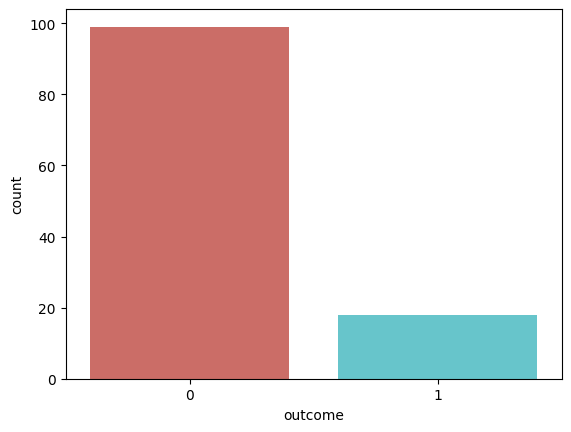

In [6]:
import seaborn as sns
%matplotlib inline

sns.countplot(x='outcome', data=dataset, palette='hls')

<Axes: xlabel='score', ylabel='outcome'>

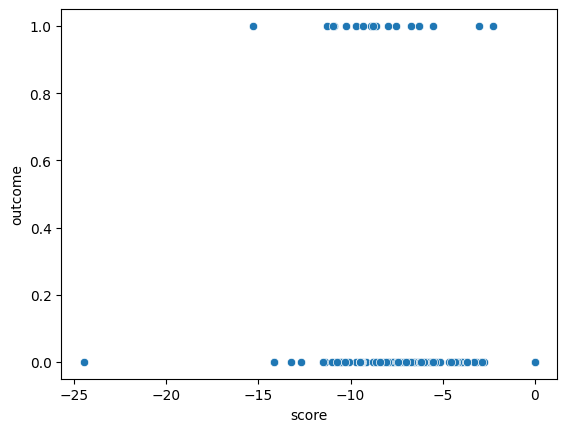

In [7]:
sns.scatterplot(x='score',y='outcome',data=dataset)

In [8]:
#..............Assigning X and Y variables...........#
x = dataset.drop(['outcome'], axis=1)
y = np.array(dataset['outcome']).reshape(-1,1)

#.............Split train and test sets..............#
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=25, stratify=y)

#...............Feature scaling..................#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

#.......Predict the Test set result.......#
# y_pred = classifier.predict(x_test)
# y_pred_quant = classifier.predict_proba(x_test)[:, 1]
y_pred=classifier.predict(x_test).reshape(-1, 1)
y_probs=classifier.predict_proba(x_test)[:,1].reshape(-1, 1)

c:\Users\neele\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
y_pred.shape

(36, 1)

In [15]:
y_probs.shape

(36, 1)

(0.0, 1.0)

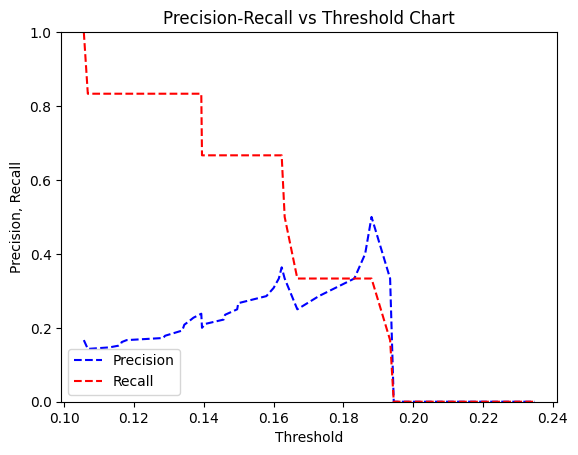

In [17]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, y_probs) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [34]:
y_pred_new_threshold = (classifier.predict_proba(x_test)[:, 1] >= 0.15).astype(int).reshape(-1, 1)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score
# Evaluation metrics for default threshold 
print("Evaluation metrics with threshold 0.5:") 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("AUC:", roc_auc_score(y_test,y_probs) )
print("Precision:", precision_score(y_test, y_pred)) 
print("Recall:", recall_score(y_test, y_pred)) 
print("F1 score:", f1_score(y_test, y_pred))

Evaluation metrics with threshold 0.5:
Accuracy: 0.8333333333333334
AUC: 0.6527777777777777
Precision: 0.0
Recall: 0.0
F1 score: 0.0


c:\Users\neele\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Evaluation metrics for new threshold 
print("Evaluation metrics with threshold 0.9:") 
print("Accuracy:", accuracy_score(y_test, y_pred_new_threshold)) 
print("AUC:", roc_auc_score(y_test,y_probs) )
print("Precision:", precision_score(y_test, y_pred_new_threshold)) 
print("Recall:", recall_score(y_test, y_pred_new_threshold)) 
print("F1 score:", f1_score(y_test, y_pred_new_threshold))

Evaluation metrics with threshold 0.9:
Accuracy: 0.6666666666666666
AUC: 0.6527777777777777
Precision: 0.2857142857142857
Recall: 0.6666666666666666
F1 score: 0.4


### Compare data of RAMJA and AIIMS

In [3]:
df2 = pd.read_excel('URINELOT1.xlsx')

In [4]:
df2.head()

,Unnamed: 0,UHID,Patients Name,Age,Gender,Date,E.coli,K. Pneumoniae,P.aurogenosa,A.baumnnii,...,cleanAIIMS,Escherichia coli_A,Klebsiella pneumoniae_A,Pseudomonas aeruginosa_A,Acinetobacter baumannii_A,Proteus mirabilis_A,Enterococcus faecalis_A,Staphylococcus aureus_A,Staphylococcus saprophyticus_A,Sterile_A
0,0,20220065432,Sahroj,33.0,F,13/02/2024,NaN,NaN,-5.26086,-4.09794,...,ENTEROCOCCUS FAECALIS,0,0,0,0,0,1,0,0,0
1,1,20230125389,Saloni,19.0,F,15/02/2024,-15.30980,-10.01740,-9.09993,-8.30414,...,E COLI,1,0,0,0,0,0,0,0,0
2,2,20180022685,Ravita,34.0,F,15/02/2024,-7.70704,-8.08910,-4.79176,-8.63416,...,CONTAMINATION,0,0,0,0,0,0,0,0,0
3,3,20240012395,kedari Devi,38.0,F,15/02/2024,-10.25510,-7.26028,-6.89303,-14.34320,...,E COLI,1,0,0,0,0,0,0,0,0
4,4,20220166372,Babita Devi,45.0,F,16/02/2024,-8.87334,-5.39780,-12.27840,-8.01114,...,E COLI & PSEUDOMNAS,1,0,1,0,0,0,0,0,0
